自公元前2150年以来，前20个国家因地震而死亡的总人数：
Country
CHINA           2075947.0
TURKEY          1188881.0
IRAN            1011453.0
ITALY            498418.0
SYRIA            439224.0
HAITI            323478.0
AZERBAIJAN       317219.0
JAPAN            279607.0
ARMENIA          191890.0
PAKISTAN         145083.0
IRAQ             136200.0
ECUADOR          135496.0
TURKMENISTAN     117412.0
PERU             102169.0
ISRAEL            90388.0
PORTUGAL          83572.0
GREECE            80378.0
CHILE             64277.0
INDIA             63507.0
TAIWAN            57153.0
Name: Deaths, dtype: float64


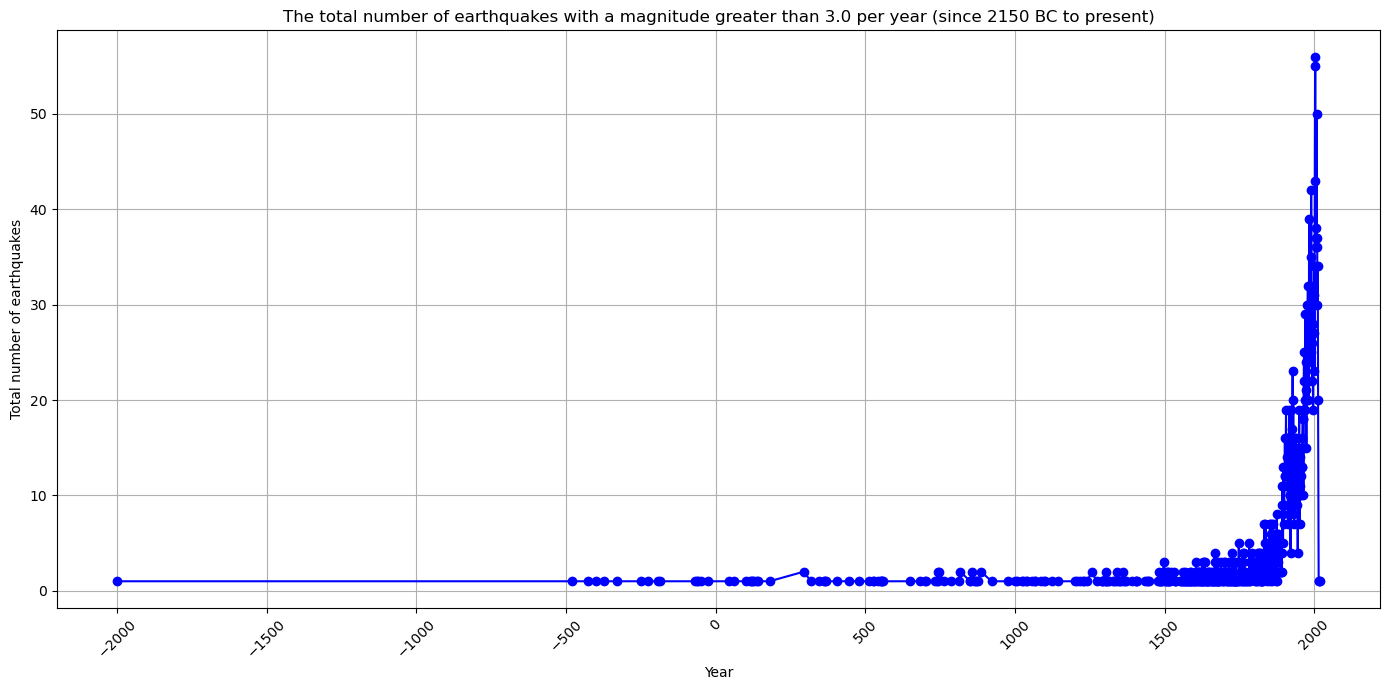


每个国家自公元前2150年以来发生的地震总数及最大地震的日期和地点（按地震总数降序）：
                      Country  Total_Earthquakes  Largest_Eq_Date  \
15                      CHINA                623           1668.0   
34                      JAPAN                419           2011.0   
71                  INDONESIA                412           2004.0   
8                        IRAN                386            856.0   
10                     TURKEY                337           1939.0   
..                        ...                ...              ...   
120                  KIRIBATI                  1           1905.0   
126                     PALAU                  1           1914.0   
128  CENTRAL AFRICAN REPUBLIC                  1           1921.0   
135                     LIBYA                  1           1963.0   
0                         NaN                  0              NaN   

         Largest_Eq_Location  
15       纬度: 35.3, 经度: 118.6  
34   纬度: 38.297, 经度: 142.373  
71     纬度: 3.295, 经度: 95.982  
8 

In [30]:
import pandas as pd  
import matplotlib.pyplot as plt  
  
# 读取文件，并重新命名
file_path = 'big_earthquakes.tsv' # 由于输入初始的文件名经常导致读取错误，所以先修改了一下文件名  
Sig_Eqs = pd.read_csv(file_path, sep='\t')  

# 计算自公元前2150年以来每个国家地震造成的死亡总数，然后将前20个国家与死亡总数一起打印出来。
death_counts = Sig_Eqs.groupby('Country')['Deaths'].sum().sort_values(ascending=False) # 按Country分组，计算每个国家的总死亡人数，然后从多到少排序。
top_countries = death_counts.head(20)    
print("自公元前2150年以来，前20个国家因地震而死亡的总人数：")  
print(top_countries)  

# 计算全球每年震级大于3.0级的地震总数（以Ms列为震级）
Sig_Eqs['Year'] = Sig_Eqs['Year'].fillna(0).astype(int) # 所有缺失值替换为0，然后转换为整数类型，
Ms_over_3 = Sig_Eqs[Sig_Eqs['Ms'] > 3.0]  
total_counts = Ms_over_3.groupby('Year').size()  
plt.figure(figsize=(14, 7))  
plt.plot(total_counts.index, total_counts.values, marker='o', linestyle='-', color='b')  
plt.title('The total number of earthquakes with a magnitude greater than 3.0 per year (since 2150 BC to present)')  
plt.xlabel('Year')  
plt.ylabel('Total number of earthquakes.tsv')  
plt.grid(True)  
plt.xticks(rotation=45)  # 旋转x轴标签以便更好地显示  
plt.tight_layout()  
plt.show()  

# 写一个函数CountEq_LargestEq，返回（1）给定国家自公元前2150年以来的地震总数，以及（2）该国有史以来发生的最大地震的日期和位置。将CountEq_LargestEq应用于文件中的每个国家，按降序报告结果
def CountEq_LargestEq(country):  
    total_earthquakes = 0 #初始化一个变量来存储地震总数  
    largest_eq_date = None  # 初始化一个变量来存储震级最大的地震的日期  
    largest_eq_location = None  # 初始化一个变量来存储震级最大的地震的地理位置  
      
    country_df = Sig_Eqs[Sig_Eqs['Country'] == country]  
      
    if not country_df.empty: # 检查是否找到了与指定国家相关的地震数据
        total_earthquakes = len(country_df)  
        if country_df['Mag'].notnull().any(): # 检查 'Mag' 列是否包含非 NaN 值 
            largest_eq_df = country_df['Mag'].idxmax()  
            largest_eq = country_df.loc[largest_eq_df] # 从country_df中检索震级最大的地震的所有信息。
            largest_eq_date = largest_eq['Year']  
            largest_eq_location = f"纬度: {largest_eq['Latitude']}, 经度: {largest_eq['Longitude']}"  
      
    return total_earthquakes, largest_eq_date, largest_eq_location 

# 对文件中的每个国家应用CountEq_LargestEq，按降序报告结果  
country_results = []  
unique_countries = Sig_Eqs['Country'].unique() # 从Country列中获取所有唯一的国家名，并存储在unique_countries数组中。 
for country in unique_countries:  
    result = CountEq_LargestEq(country)  
    country_results.append({'Country': country, 'Total_Earthquakes': result[0], 'Largest_Eq_Date': result[1], 'Largest_Eq_Location': result[2]})  
country_results_df = pd.DataFrame(country_results) # 将country_results列表转换成一个DataFrame对象  
sorted_country_results_df = country_results_df.sort_values(by='Total_Earthquakes', ascending=False)  
print("\n每个国家自公元前2150年以来发生的地震总数及最大地震的日期和地点（按地震总数降序）：")  
print(sorted_country_results_df)

C:\Users\huawei\AppData\Local\Temp\ipykernel_33968\3586154212.py:6: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Baoan_Weather_1998_2022.csv')


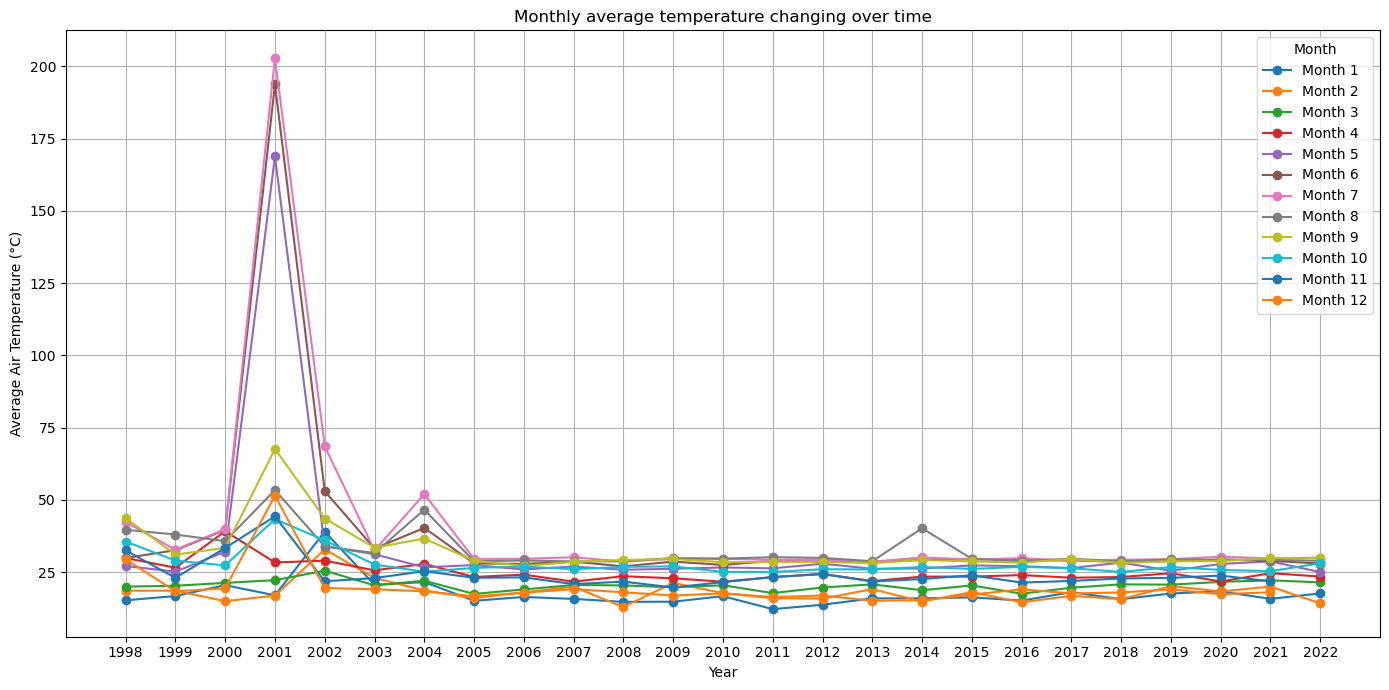

In [32]:
# 绘制月平均气温与观测时间的关系图。
import pandas as pd  
import matplotlib.pyplot as plt  
import numpy as np  
  
df = pd.read_csv('Baoan_Weather_1998_2022.csv') # 由于输入初始的文件名经常导致读取错误，所以先修改了一下文件名  
df['DATE'] = pd.to_datetime(df['DATE']) # 转换日期列为datetime类型  
df['YEAR'] = df['DATE'].dt.year  
df['MONTH'] = df['DATE'].dt.month # 提取年份和月份信息 
  
# 由于温度数据包含小数点后的逗号，需要转换为正确的浮点数格式  
df['TMP'] = df['TMP'].replace({',': '.'}, regex=True).astype(float) / 10  # 除以10是因为SCALING FACTOR为10  

monthly_temp_avg = df.groupby(['YEAR', 'MONTH'])['TMP'].mean().reset_index() # 对每个月份的平均气温进行汇总 
  
# 绘图  
plt.figure(figsize=(14, 7))  
for month in range(1, 13):  
    # 筛选出每个月份的数据  
    month_data = monthly_temp_avg[monthly_temp_avg['MONTH'] == month]  
    # 绘制折线图  
    plt.plot(month_data['YEAR'], month_data['TMP'], label=f'Month {month}', marker='o')  
  
plt.title('Monthly average temperature changing over time')  
plt.xlabel('Year')  
plt.ylabel('Average Air Temperature (°C)')  
plt.legend(title='Month')  
plt.grid(True)  
plt.xticks(np.arange(min(monthly_temp_avg['YEAR']), max(monthly_temp_avg['YEAR']) + 1, 1.0))  
plt.tight_layout()  
plt.show()  


C:\Users\huawei\AppData\Local\Temp\ipykernel_33968\1034078141.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.csv',


Top 10 hurricanes by wind speed:
                  SID      NAME
665954  2015293N13266  PATRICIA
665952  2015293N13266  PATRICIA
665956  2015293N13266  PATRICIA
427636  1980214N11330     ALLEN
178209  1935241N23291       NaN
178210  1935241N23291       NaN
178212  1935241N23291       NaN
482074  1988253N12306   GILBERT
552459  1997253N12255     LINDA
605746  2005289N18282     WILMA


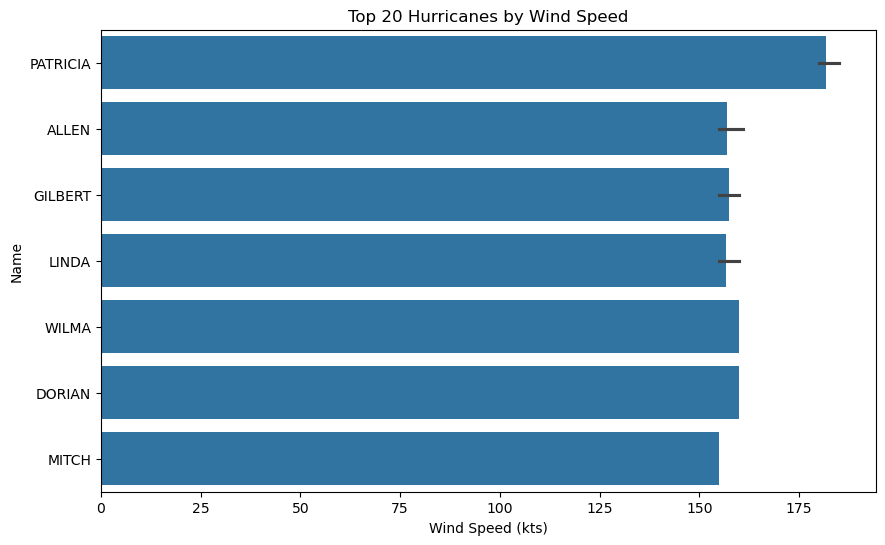

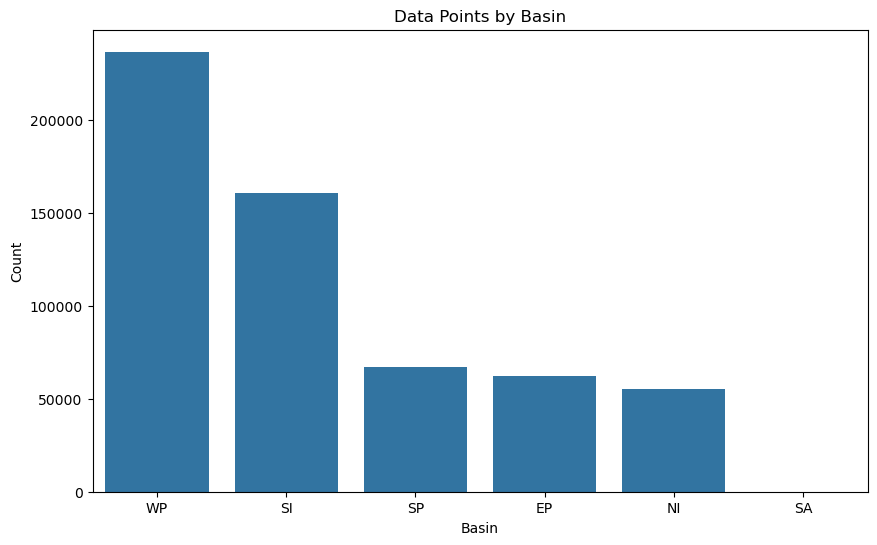

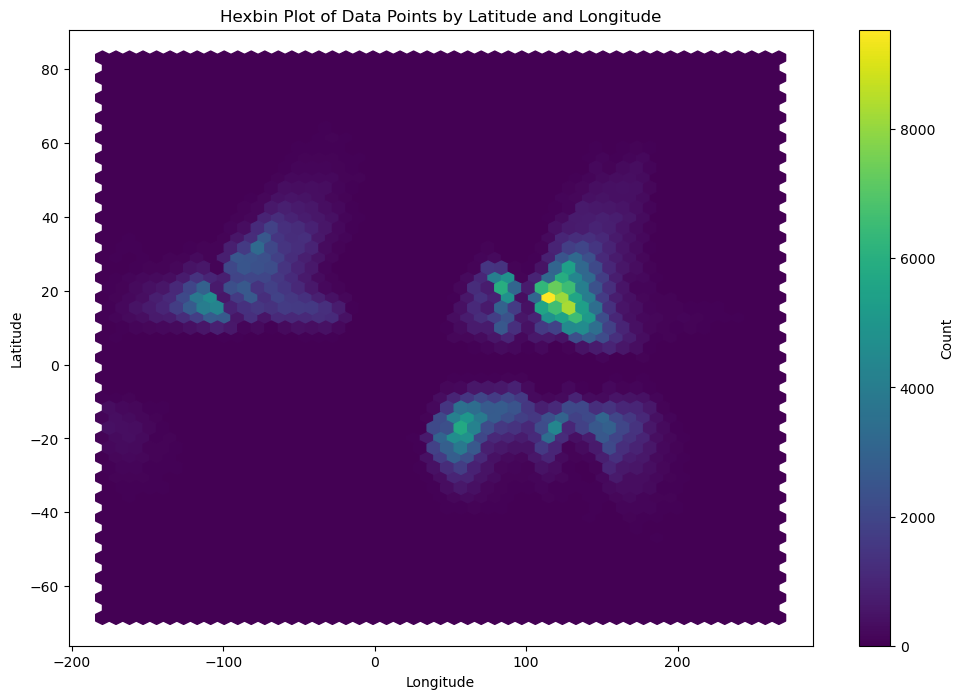

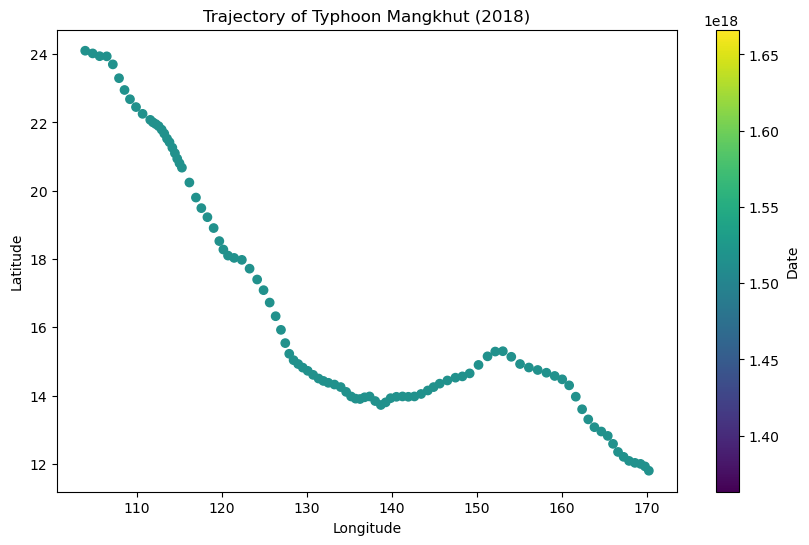

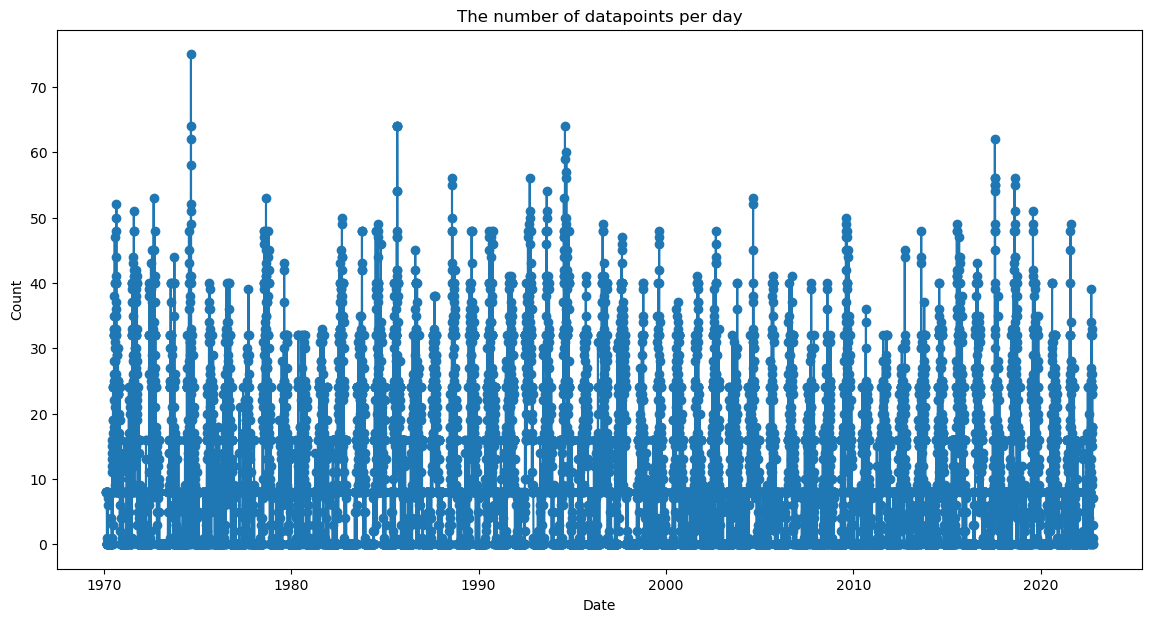

C:\Users\huawei\AppData\Local\Temp\ipykernel_33968\1034078141.py:86: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  climatology = daily_counts.resample('Y').mean()
C:\Users\huawei\AppData\Local\Temp\ipykernel_33968\1034078141.py:92: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_anomalies = anomalies.resample('Y').mean()


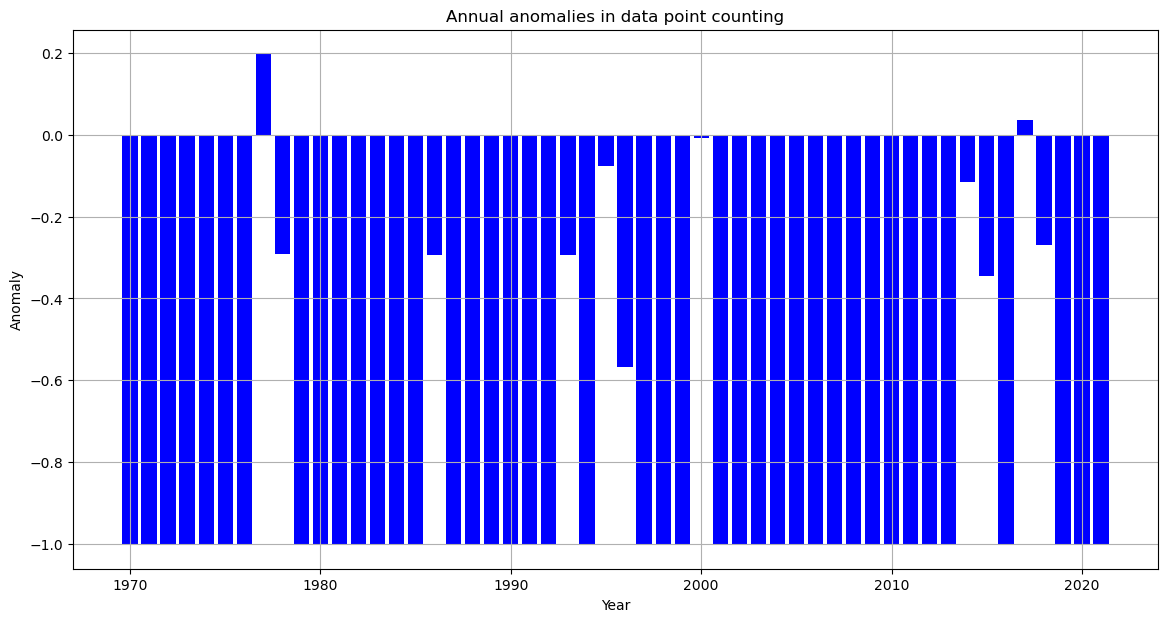

Years with anomalous hurricane activity:
Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1987, 1988, 1989, 1990, 1991, 1992, 1994, 1996, 1997, 1998,
       1999, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2016, 2019, 2020, 2021],
      dtype='int32', name='ISO_TIME')


In [38]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from datetime import datetime  
df = pd.read_csv('ibtracs.ALL.list.csv',
                 usecols=range(17),
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])
df.head()

# 问题1将风暴标识（SID）的数据分组，根据风速（WMO_wind）报告10个最大飓风的名称（NAME）  
df.replace('NOT_NAMED', pd.NA, inplace=True)  
df.replace('', pd.NA, inplace=True) # 处理数据中的缺失值  
  
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce') # 转换数值类型
top_10_hurricanes = df.nlargest(10, 'WMO_WIND')[['SID', 'NAME']] # 从结果中只选择SID和NAME这两列。 
print("Top 10 hurricanes by wind speed:")
print(top_10_hurricanes)

# 问题2：制作20个最强飓风的风速（WMO_WIND）柱状图。  
top_20_hurricanes = df.nlargest(20, 'WMO_WIND')  
plt.figure(figsize=(10, 6))  
sns.barplot(x='WMO_WIND', y='NAME', data=top_20_hurricanes)  
plt.title('Top 20 Hurricanes by Wind Speed')  
plt.xlabel('Wind Speed (kts)')  
plt.ylabel('Name')  
plt.show()  
  
# 问题3：按盆地绘制所有数据点的计数作为柱状图。  
basin_counts = df['BASIN'].value_counts()  
plt.figure(figsize=(10, 6))  
sns.barplot(x=basin_counts.index, y=basin_counts.values)  
plt.title('Data Points by Basin')  
plt.xlabel('Basin')  
plt.ylabel('Count')  
plt.show()  


# 问题4：在Latitude和Longitude中制作数据点位置的hexbin图。  
df['LON'] = pd.to_numeric(df['LON'], errors='coerce')  
df['LAT'] = pd.to_numeric(df['LAT'], errors='coerce') # 数据转换
df['LON'] = df['LON'].fillna(df['LON'].mean())  
df['LAT'] = df['LAT'].fillna(df['LAT'].mean())
df.dropna(subset=['LON', 'LAT'], inplace=True) # 删除df中任何在LON或LAT列中包含NaN值的行
 
plt.figure(figsize=(12, 8))  
plt.hexbin(df['LON'], df['LAT'], gridsize=50, cmap='viridis')  
plt.colorbar(label='Count')  
plt.title('Hexbin Plot of Data Points by Latitude and Longitude')  
plt.xlabel('Longitude')  
plt.ylabel('Latitude')  
plt.show()  

# 问题5：找到台风山竹（2018年），并将其轨迹绘制为散点图。
df['SEASON'] = pd.to_datetime(df['SEASON'].astype(str), format='%Y', errors='coerce') # 数据转换 将SEASON列转换为日期时间类型
df['Year'] = df['SEASON'].dt.year  
mangkhut = df[(df['NAME'] == 'MANGKHUT') & (df['Year'] == 2018)] # 筛选  
if not mangkhut.empty:  
    # 绘制散点图  
    plt.figure(figsize=(10, 6))  
    plt.scatter(mangkhut['LON'], mangkhut['LAT'], c=mangkhut['SEASON'], cmap='viridis')  
    plt.colorbar(label='Date')  
    plt.title('Trajectory of Typhoon Mangkhut (2018)')  
    plt.xlabel('Longitude')  
    plt.ylabel('Latitude')  
    plt.show()  
else:  
    print("No data found for Typhoon Mangkhut in 2018.") # 之前一直调试图片都是空白的，所以加了个if语句来看看修改后的数据能不能呈现

# 问题6：创建一个过滤的数据框架，其中仅包含1970年以来来自北太平洋西部（“WP”）和北太平洋东部（“EP”）盆地的数据。  
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce') # 数据转换 将ISO_TIME列转换为日期时间类型
df['Yea'] = df['ISO_TIME'].dt.year  
filtered_df = df[(df['Yea'] >= 1970) & (df['BASIN'].isin(['WP', 'EP']))] # 筛选  
  
# 问题7：绘制每天的数据点数量。  
daily_counts = filtered_df.resample('D', on='ISO_TIME').size()  
plt.figure(figsize=(14, 7))  
plt.plot(daily_counts.index, daily_counts.values, marker='o')  
plt.title('The number of datapoints per day')  
plt.xlabel('Date')  
plt.ylabel('Count')  
plt.show()  

# 问题8：计算数据点计数的气候学，作为一年中天数的函数
climatology = daily_counts.resample('Y').mean()  
  
# 问题9：根据气候学计算每日计数的异常。  
anomalies = (daily_counts - climatology) / climatology # 计算每日计数与气候态之间的相对差异  
  
# 问题10：以年度分辨率对异常时间序列进行重新采样并绘制  
yearly_anomalies = anomalies.resample('Y').mean()  
  
# 绘图  
plt.figure(figsize=(14, 7))  
plt.bar(yearly_anomalies.index.year, yearly_anomalies.values, color='blue')  
plt.title('Annual anomalies in data point counting')  
plt.xlabel('Year')  
plt.ylabel('Anomaly')  
plt.grid(True)  
plt.show()  
  
# 检测异常年份  
anomalous_years = yearly_anomalies[abs(yearly_anomalies) > 0.5].index # 绝对值＞0.5 
print("Years with anomalous hurricane activity:")  
print(anomalous_years.year)


含有 NaN 值的行数量： 6967
NAME 为空的行数量： 0


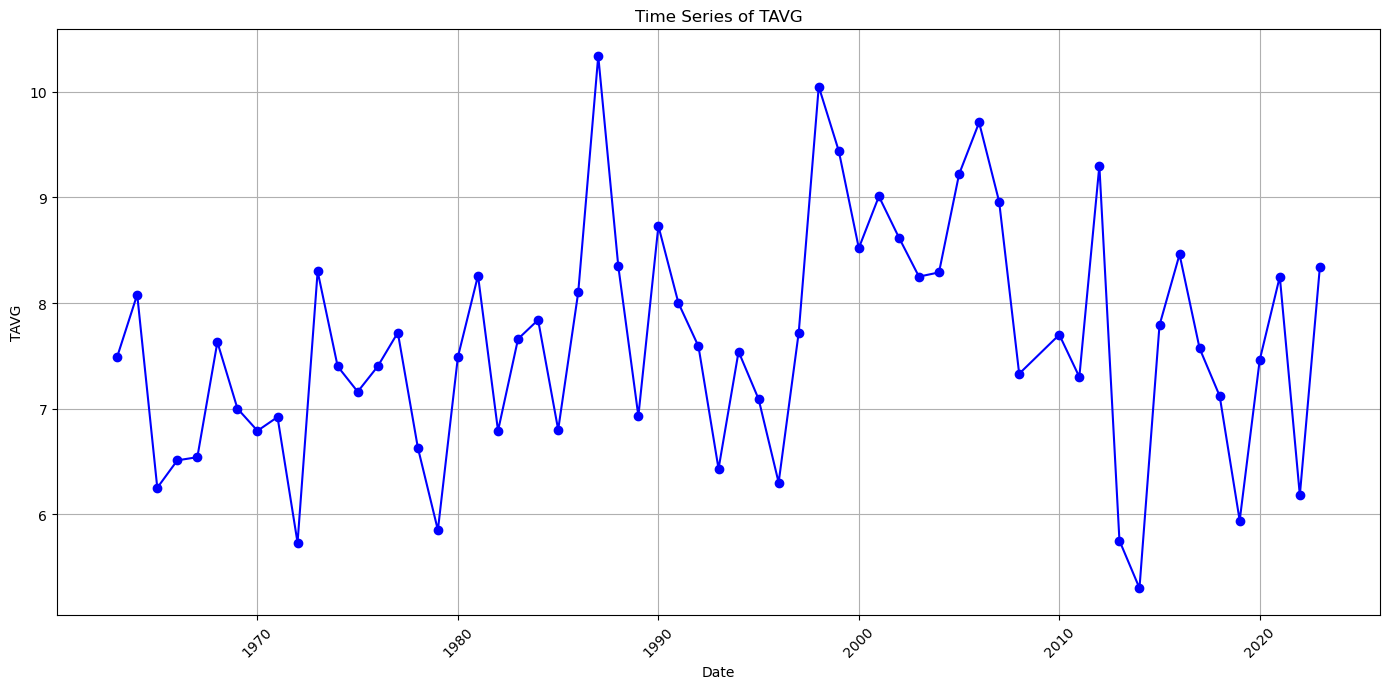

TAVG的统计信息:
count    60.000000
mean      7.620333
std       1.097682
min       5.300000
25%       6.890000
50%       7.580000
75%       8.292500
max      10.340000
Name: TAVG, dtype: float64
TAVG的偏度: 0.2297484589902748
TAVG的峰度: -0.09534896674444715
TAVG的缺失值数量: 3
TAVG的异常值数量: 0
TAVG与TMAX的相关性: 0.9532118124676898


In [28]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
  
# 问题1：加载csv、XLS或XLSX文件，并清除可能存在缺失值或质量差的数据点。  
df = pd.read_csv('USC00218450.csv')  
print("\n含有 NaN 值的行数量：", df.isnull().sum().sum())  
print("NAME 为空的行数量：", df[df['NAME'] == ''].shape[0]) # 检查是否存在 NaN 值和 NAME 为空的行
df_filled = df.fillna(0) # 将NaN 值转换为0 
df = df[df['NAME'] != '']  # 删除'NAME'列为空字符串的行 
if df.empty:# 确保有数据可用于绘图  
    print("没有可用数据用于绘图。")  
else:  
    df['DATE'] = pd.to_datetime(df['DATE'].astype(str), format='%Y', errors='coerce') # 转换日期格式  

# 问题2：绘制某变量的时间序列（选择'TAVG'作为变量）  
    if 'TAVG' in df.columns and not df['TAVG'].isnull().all(): # 检查'TAVG'列是否存在且非空 
        plt.figure(figsize=(14, 7))  
        plt.plot(df['DATE'], df['TAVG'], marker='o', linestyle='-', color='b')  
        plt.title('Time Series of TAVG')  
        plt.xlabel('Date')  
        plt.ylabel('TAVG')  
        plt.xticks(rotation=45)  
        plt.grid(True)  
        plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域  
        plt.show()  
    else:  
        print("TAVG 列不存在或全部为 NaN，无法绘图。") 

# 问题3：对变量进行至少5次简单的统计检查
information = df['TAVG'].describe()  
print("TAVG的统计信息:")  
print(information)  
  
# 检查TAVG的偏度，以了解数据的分布形态  
skewness = df['TAVG'].skew()  
print(f"TAVG的偏度: {skewness}")  
  
# 检查TAVG的峰度，以了解数据的集中程度  
kurtosis = df['TAVG'].kurtosis()  
print(f"TAVG的峰度: {kurtosis}")  
  
# 检查TAVG的缺失值情况  
missing_values = df['TAVG'].isnull().sum()  
print(f"TAVG的缺失值数量: {missing_values}")  
  
# 检查TAVG是否含有异常值（这里使用3倍标准差作为阈值）  
threshold = stats['mean'] + 3 * stats['std']  
outliers = df[df['TAVG'] > threshold]  
print(f"TAVG的异常值数量: {len(outliers)}")  
  
# 检查TAVG与另一个变量（TMAX）的相关性  
correlation = df['TAVG'].corr(df['TMAX'])  
print(f"TAVG与TMAX的相关性: {correlation}")